# NLA 29.1

In [521]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import hilbert
plt.rcParams['figure.figsize'] = (10.0, 6)
# set output format
np.set_printoptions(precision=8)
np.set_printoptions(suppress=True)

In [522]:
## 29.1
A = hilbert(4)
#A = np.random.randn(4,4)
#A = A + A.T # generate a symmetric matrix
print A # generate a symmetric matrix

[[ 1.          0.5         0.33333333  0.25      ]
 [ 0.5         0.33333333  0.25        0.2       ]
 [ 0.33333333  0.25        0.2         0.16666667]
 [ 0.25        0.2         0.16666667  0.14285714]]


## (a)

In [533]:
def tridiag(A):
    m = np.shape(A)[0]
    T = np.copy(A)
   
    for k in range (0, m-2):
        x = T[k+1:m, k].squeeze()
        e1 = np.zeros_like(x)
        e1[0] = np.copysign(np.linalg.norm(x), x[0])
        v = e1 + x
        v = v / np.linalg.norm(v)
        T[k+1:m, k:m]=T[k+1:m, k:m]
        -2*np.outer(v,(v.dot(T[k+1:m,k:m])))
        
        T[0:m, k+1:m]=T[0:m, k+1:m]
        -2*np.outer((T[0:m, k+1:m].dot(v)),v.T)
                 
    return  T

## (b)

In [524]:
def qralg(T):
    Tnew = np.copy(T)
    m = np.shape(Tnew)[0]
    v = []
    
    while np.absolute(Tnew[m-1,m-2]) > 1.0e-12:
        Q, R = np.linalg.qr(Tnew, mode='complete')
        Tnew = R.dot(Q)
        v.append(np.absolute(Tnew[m-1,m-2])) 
        
    return Tnew, v

In [534]:
T = tridiag(A)
print 'T:'
print T

T:
[[ 1.          0.5         0.33333333  0.25      ]
 [ 0.5         0.33333333  0.25        0.2       ]
 [ 0.33333333  0.25        0.2         0.16666667]
 [ 0.25        0.2         0.16666667  0.14285714]]


In [526]:
Tnew, v = qralg(T)
print 'Tnew:'
print Tnew

Tnew:
[[ 1.50021428 -0.00001781  0.          0.        ]
 [-0.00001781  0.16914122  0.00000001  0.        ]
 [ 0.          0.00000001  0.00673827  0.        ]
 [-0.         -0.          0.          0.0000967 ]]


## (c)

output eigenvalues:
[ 0.0000967   0.00673827  0.16914122  1.50021428]
eigenvalues by default function:
[ 1.50021428  0.16914122  0.00673827  0.0000967 ] 



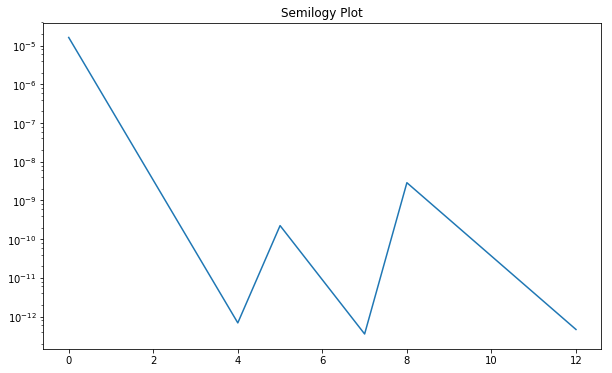

In [531]:
T = tridiag(A)
Tnew, alist = qralg(T)
ew = np.zeros(np.shape(T)[0])

for j in range(np.shape(T)[0]-1): 
    Tnew, v = qralg(Tnew)
    alist.extend(v)
     
    newT = np.absolute(Tnew)
    m = np.shape(Tnew)[0]
    u = np.zeros(m)
    for i in range(m):
        u[i] = np.sum(newT[i,:]) - newT[i,i]    
    k = np.argmin(u)
    ew[j] = Tnew[k,k]
    Tnew = np.delete(np.delete(Tnew, k, 0),k,1)  
ew[ew == 0] = Tnew[0,0]

print "output eigenvalues:"
print ew
print 'eigenvalues by default function:'
print np.linalg.eigvals(A), '\n'
plt.semilogy(range(len(alist)), alist) 
plt.title('Semilogy Plot')
plt.show()